In [1]:
# overfitting and Regulation

In [2]:
import tensorflow as tf

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# 중간에 큰 수가 있다
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
              [823, 828, 1828100, 821, 828],
              [820, 824.5, 1438100, 818.979, 824.159],
              [816, 821, 1008100, 815.4899, 819.23999],
              [819.359, 823, 1188100, 818.469, 818.979],
              [819, 823, 1198100, 816, 820.45],
              [811.700, 815.25, 1098100, 809.78, 813.669],
              [809.51, 816.65, 1398100, 804.539, 809.559]])

In [6]:
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

In [7]:
def normalization(data):
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  return numerator / denominator

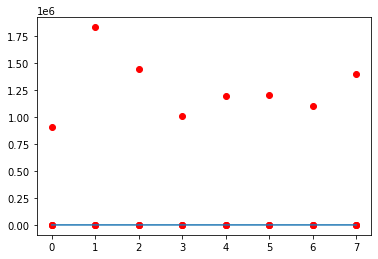

[[1.         1.         0.         1.         1.        ]
 [0.70443964 0.70054899 1.         0.69131984 0.83439765]
 [0.54778145 0.50824142 0.57608696 0.60644301 0.6606044 ]
 [0.33890387 0.31593386 0.10869565 0.45990975 0.43803456]
 [0.51430882 0.4258239  0.30434783 0.58502432 0.42622558]
 [0.49556206 0.4258239  0.31521739 0.48133264 0.49278373]
 [0.11436047 0.         0.20652174 0.22010858 0.18596466]
 [0.         0.07692303 0.5326087  0.         0.        ]]


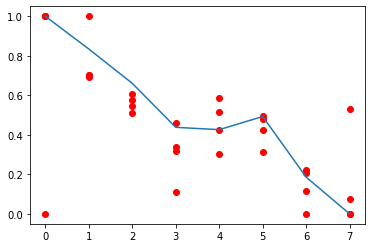

In [9]:
xy = normalization(xy)

plt.plot(x_train, 'ro')
plt.plot(y_train)

plt.show()

xy = normalization(xy)
print(xy)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)

plt.show()

In [12]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

W = tf.Variable(tf.random.normal([4, 1]), dtype=tf.float32)
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32)

In [13]:
def linearReg_fn(features):
  hypothesis = tf.matmul(features, W) + b
  return hypothesis

def l2_loss(loss, beta = 0.01):
    W_reg = tf.nn.l2_loss(W) # output = sum(t ** 2) / 2
    loss = tf.reduce_mean(loss + W_reg * beta)
    return loss

def loss_fn(hypothesis, features, labels, flag = False):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    if(flag):
        cost = l2_loss(cost)
    return cost

In [15]:
is_decay = True
starter_learning_rate = 0.1

if(is_decay):
  global_step = tf.Variable(0, trainable=False)
  learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(starter_learning_rate,50, 0.96, staircase=True)
  optimizer =  tf.keras.optimizers.SGD(learning_rate)
else:
  optimizer =  tf.keras.optimizers.SGD(learning_rate = starter_learning_rate)

def grad(hypothesis, features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels, l2_flag)
    return tape.gradient(loss_value, [W,b]), loss_value


for step in range(101):
  iterator = iter(dataset)
  for features, labels in dataset:
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    grads, loss_value = grad(linearReg_fn(features),features,labels,False)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W,b]))
    if step % 10 == 0 :
      print(" Iter: {}, Loss: {:.4f}, Learning Rate : {:.8f}".format(step, loss_value, optimizer.learning_rate(step)))

 Iter: 0, Loss: 0.0096, Learning Rate : 0.10000000
 Iter: 10, Loss: 0.0085, Learning Rate : 0.10000000
 Iter: 20, Loss: 0.0076, Learning Rate : 0.10000000
 Iter: 30, Loss: 0.0070, Learning Rate : 0.10000000
 Iter: 40, Loss: 0.0065, Learning Rate : 0.10000000
 Iter: 50, Loss: 0.0061, Learning Rate : 0.09600000
 Iter: 60, Loss: 0.0059, Learning Rate : 0.09600000
 Iter: 70, Loss: 0.0057, Learning Rate : 0.09600000
 Iter: 80, Loss: 0.0055, Learning Rate : 0.09600000
 Iter: 90, Loss: 0.0054, Learning Rate : 0.09600000
 Iter: 100, Loss: 0.0052, Learning Rate : 0.09216000
